## Домашнее задание <a class='anchor' id='hw'>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

__Задача:__ предсказание баллов ЕГЭ ученика

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Нормализация [0, 1]

In [4]:
X[:, 1].min(), X[:, 1].max()

(0, 10)

In [5]:
X[:, 2].min(), X[:, 2].max()

(450, 2000)

In [6]:
def min_max_scale(X):
    return (X - X.min()) / (X.max() - X.min())

In [7]:
X_norm = X.copy()
X_norm = X_norm.astype(np.float64)
X_norm

array([[1.00e+00, 1.00e+00, 5.00e+02, 1.00e+00],
       [1.00e+00, 1.00e+00, 7.00e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 7.50e+02, 2.00e+00],
       [1.00e+00, 5.00e+00, 6.00e+02, 1.00e+00],
       [1.00e+00, 3.00e+00, 1.45e+03, 2.00e+00],
       [1.00e+00, 0.00e+00, 8.00e+02, 1.00e+00],
       [1.00e+00, 5.00e+00, 1.50e+03, 3.00e+00],
       [1.00e+00, 1.00e+01, 2.00e+03, 3.00e+00],
       [1.00e+00, 1.00e+00, 4.50e+02, 1.00e+00],
       [1.00e+00, 2.00e+00, 1.00e+03, 2.00e+00]])

In [8]:
X_norm[:, 1] = min_max_scale(X_norm[:, 1])
X_norm[:, 2] = min_max_scale(X_norm[:, 2])
X_norm

array([[1.        , 0.1       , 0.03225806, 1.        ],
       [1.        , 0.1       , 0.16129032, 1.        ],
       [1.        , 0.2       , 0.19354839, 2.        ],
       [1.        , 0.5       , 0.09677419, 1.        ],
       [1.        , 0.3       , 0.64516129, 2.        ],
       [1.        , 0.        , 0.22580645, 1.        ],
       [1.        , 0.5       , 0.67741935, 3.        ],
       [1.        , 1.        , 1.        , 3.        ],
       [1.        , 0.1       , 0.        , 1.        ],
       [1.        , 0.2       , 0.35483871, 2.        ]])

Стандартизация

In [9]:
def standart_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [10]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standart_scale(X_st[:, 1])
X_st[:, 2] = standart_scale(X_st[:, 2])
X_st

array([[ 1.        , -0.70710678, -0.97958969,  1.        ],
       [ 1.        , -0.70710678, -0.56713087,  1.        ],
       [ 1.        , -0.35355339, -0.46401617,  2.        ],
       [ 1.        ,  0.70710678, -0.77336028,  1.        ],
       [ 1.        ,  0.        ,  0.97958969,  2.        ],
       [ 1.        , -1.06066017, -0.36090146,  1.        ],
       [ 1.        ,  0.70710678,  1.08270439,  3.        ],
       [ 1.        ,  2.47487373,  2.11385144,  3.        ],
       [ 1.        , -0.70710678, -1.08270439,  1.        ],
       [ 1.        , -0.35355339,  0.05155735,  2.        ]])

In [11]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [12]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    w_list = [] # пустой список всех весов
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        dReg = reg * W 
        
        W -= eta * dQ + dReg
        w_list.append(W.copy()) # добавляем вес в список
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))} W = {W} lambda = {reg}')
    return w_list

### 1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод

In [13]:
w_list1 = [] # список весов при каждом лямбда

w_list1 = gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=1e-8) # записываем список весов 

Final MSE: 25.008428251658167 W = [40.62054732  6.29146668 -0.99217763  9.31483697] lambda = 1e-08


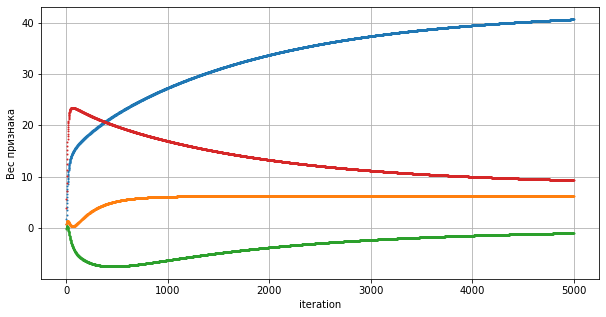

In [14]:
# График для одной лямбда. Не совсем понял какой именно график нужен, поэтому ниже второй вариант.

plt.figure(figsize=(10,5))
plt.plot(range(len(w_list1)), w_list1,linewidth=0, marker='o', markersize=1)
plt.grid()
    
plt.xlabel('iteration')
plt.ylabel('Вес признака');

In [15]:
lambda_list = [1e-4, 1e-1]
w_list_full = []

for lamb in lambda_list:
    w_list_full.append(gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-2, reg=lamb))

Final MSE: 25.777408112109345 W = [37.6071762   6.0887961  -1.98031461 10.98872927] lambda = 0.0001
Final MSE: 1037.1616579116057 W = [ 6.31330114  0.71544684  0.3759989  10.95305481] lambda = 0.1


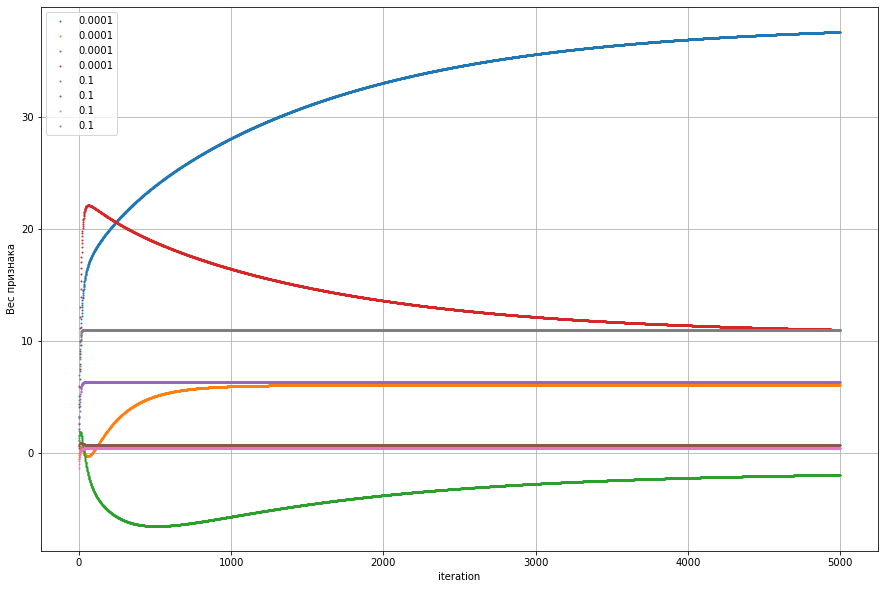

In [16]:
# График сравнения изменения весов при различных лямбдах.

plt.figure(figsize=(15,10))
plt.plot(w_list_full[0], linewidth=0, marker='o', markersize=1, label=lambda_list[0])
plt.plot(w_list_full[1], linewidth=0, marker='o', markersize=1, label=lambda_list[1])
plt.legend()
plt.grid()
    
plt.xlabel('iteration')
plt.ylabel('Вес признака');

Вывод: при лямбда 0.1 веса практически не изменяются, т.к. лямбда их сильно ограничивает. При лямбда 1e-4 веса плавно изменяются, пока не подбираются оптимальные.

### 2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.

In [17]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-2, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    w_list = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        
        dQ = 2/n * X.T @ (y_pred - y) 
        dReg = reg * W/abs(W) # l1 регуляризация. (|W|)' = W/|W|
        
        W -= eta * dQ + dReg
        w_list.append(W.copy())
#         if i % (iterations / 10) == 0:
#             print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))} W = {W} lambda = {reg}')
    return w_list

In [18]:
w_list2 = [] 

w_list2 = gradient_descent_reg_l1(X_st, y, iterations=5000,  eta=1e-2, reg=1e-4)

Final MSE: 24.9959109536237 W = [40.71291309  6.26891927 -0.9296666   9.2592846 ] lambda = 0.0001


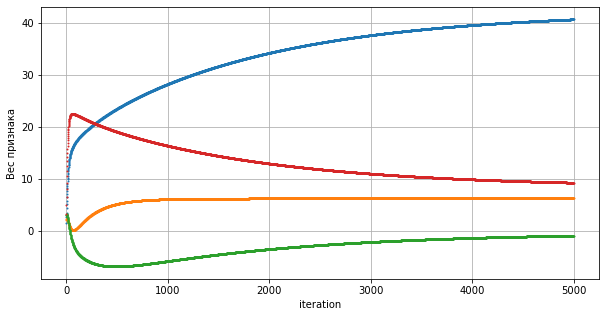

In [19]:
plt.figure(figsize=(10,5))
plt.plot(range(len(w_list2)), w_list2,linewidth=0, marker='o', markersize=1)
plt.grid()
    
plt.xlabel('iteration')
plt.ylabel('Вес признака');

### 3. *Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?



Применения нормализации и стандартизации вместе возможно. Но скорее всего не имеет никакого смысла, т.к. у данных методов разные области применения и результат. Нормализация приводить все значения в диапазон [0; 1], а стандартизация показывает "расстояние" от среднего значения.


### 4. *Сгенерируйте датасет при помощи <code>sklearn.datasets.make_regression</code> и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.

In [20]:
X, Y, coef = datasets.make_regression(n_samples=1000, n_features=4, n_informative=4, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[ 1.24925579e+00,  7.07212456e-02,  1.20681107e+00,
        -4.64958307e-01],
       [-1.10835167e+00, -9.71332206e-01, -5.90090600e-01,
         9.90152682e-01],
       [ 2.88741056e-03, -5.36743869e-01, -2.99676160e+00,
        -1.23253914e+00],
       ...,
       [-2.01348046e-01, -1.45522308e+00, -8.42590683e-01,
        -5.44031799e-02],
       [-2.78885368e-01, -2.12077334e+00, -6.75848505e-01,
        -1.32161204e+00],
       [ 4.79509962e-01,  1.10741640e+00,  1.59185865e+00,
        -1.92939070e+00]])

array([ 1.17303671e+02, -1.19458934e+02, -2.97941285e+02, -4.61460192e+01,
       -6.74986602e+00, -4.95563993e+01, -1.61930403e+02, -1.28089758e+01,
        2.01600024e+00,  4.18600438e+01, -1.08152111e+02, -2.46230431e+02,
        1.91307900e+02, -2.47847687e+01, -1.11779739e+01,  1.69589303e+02,
       -1.54139865e+02,  8.91594235e+00,  1.73791155e+01,  1.25367501e+02,
        1.22885018e+02, -7.37502697e+01, -2.02371563e+02, -1.39579840e+02,
       -6.92034453e+01,  1.54696893e+01, -1.34084153e+01,  2.44912164e+02,
       -4.50920649e+01, -3.09862881e+01, -5.14975022e+01,  9.10708296e+01,
        7.32052210e+01,  2.94262809e+01,  7.77651764e+01, -8.69798990e+01,
        2.44702676e+01,  7.76803526e+01, -1.49800519e+02,  1.96410179e+01,
       -8.66106283e+01,  6.25843067e+01,  1.29812084e+02, -5.87042533e+01,
       -2.10168448e+01, -2.46566935e+02,  3.02089363e+02,  4.41858553e+01,
        9.71908438e+01,  5.07599038e+01, -2.91259055e+01,  4.35461014e+01,
        4.53194194e+01,  

array([34.97278679, 75.03686389, 71.61510299, 34.65254101])

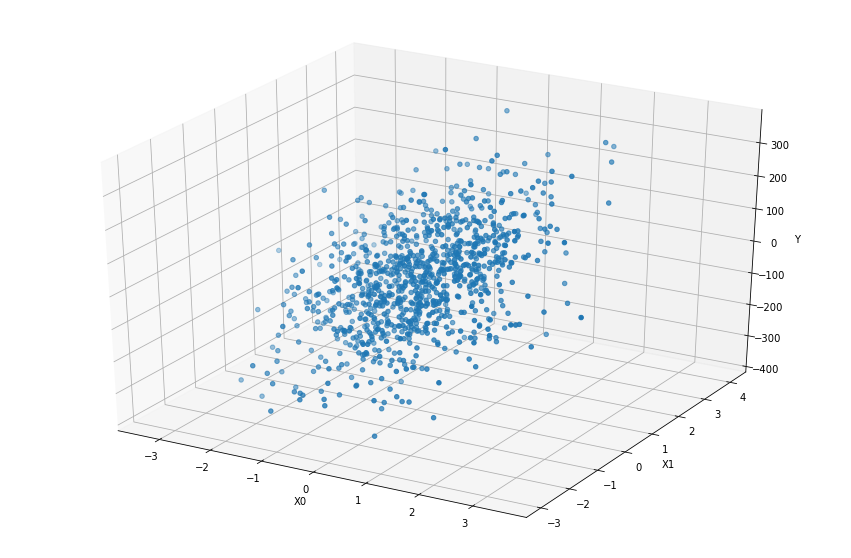

In [21]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], Y)

ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('Y')
plt.show()

In [22]:
def gradient_descent(X, y, iterations, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = []
    
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
        err_list.append(err)
            
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return err_list

In [23]:
def stohastic_gradient_descent(X, y, iterations, batch_size, eta=1e-4):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]
    err_list = []
    
    n_batch = n // batch_size    
    if n % batch_size != 0:
        n_batch += 1
    print(f'amount of batches is {n_batch}')
        
    for i in range(0, iterations):
        
        for b in range(n_batch):
            start = batch_size * b
            end = batch_size * (b + 1)
            
#             print(b, start, end)
            
            X_tmp = X[start : end, ]
            y_tmp = y[start : end]

            y_pred_tmp = np.dot(X_tmp, W)
            err = calc_mse(y_tmp, y_pred_tmp)

            dQ = 2/len(y_tmp) * X_tmp.T @ (y_pred_tmp - y_tmp) # градиент функции ошибки
            W -= (eta * dQ)
        err_list.append(err)


        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')
    
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return err_list

In [24]:
%%time
err_list_gd = gradient_descent(X, Y, 5000, eta=1e-3)
len(err_list_gd)

Iter: 0, weights: [-0.6315708  -1.27508909 -0.09989735 -0.82355141], error 14074.360921470057
Iter: 500, weights: [22.72694458 49.06231135 44.47740201 22.74314587], error 1797.7062871964704
Iter: 1000, weights: [30.81684191 66.1602573  61.42127912 30.76112221], error 250.50338428303357
Iter: 1500, weights: [33.6326883  71.99135278 67.8345484  33.47625475], error 53.367732115855546
Iter: 2000, weights: [34.61796276 73.9882139  70.2536036  34.39063338], error 27.998948841880186
Iter: 2500, weights: [34.9646144  74.67490225 71.16347131 34.69656567], error 24.70501141211408
Iter: 3000, weights: [35.08727643 74.9120349  71.50489492 34.798124  ], error 24.273894785663824
Iter: 3500, weights: [35.13093658 74.99426507 71.6327652  34.83151584], error 24.217068249291586
Iter: 4000, weights: [35.1465708  75.02289697 71.68057907 34.84236444], error 24.209530596177405
Iter: 4500, weights: [35.15220354 75.03290624 71.69843446 34.8458356 ], error 24.208525187636756
Final MSE: 24.208390414122213
CPU t

5000

In [25]:
%%time
err_list_sgd = stohastic_gradient_descent(X, Y, 5000, 250, eta=1e-3)
len(err_list_sgd)

amount of batches is 4
Iter: 0, weights: [0.22663778 2.24962927 1.17283171 0.37359116], error 15238.024296142303
Iter: 500, weights: [34.6245124  74.03418839 70.28391496 34.40832688], error 28.909333561590895
Iter: 1000, weights: [35.14616969 75.02363031 71.68088122 34.84258929], error 26.498443580458524
Iter: 1500, weights: [35.15485332 75.0381924  71.70817205 34.84732271], error 26.527932415218064
Iter: 2000, weights: [35.15501243 75.03841966 71.70869707 34.84735346], error 26.528496663810238
Iter: 2500, weights: [35.15501561 75.03842336 71.70870711 34.84735303], error 26.52850735316139
Iter: 3000, weights: [35.15501568 75.03842343 71.70870731 34.847353  ], error 26.528507560808194
Iter: 3500, weights: [35.15501568 75.03842343 71.70870731 34.847353  ], error 26.52850756493256
Iter: 4000, weights: [35.15501568 75.03842343 71.70870731 34.847353  ], error 26.52850756501554
Iter: 4500, weights: [35.15501568 75.03842343 71.70870731 34.847353  ], error 26.528507565015598
Final MSE: 24.2083

5000

Text(0, 0.5, 'MSE')

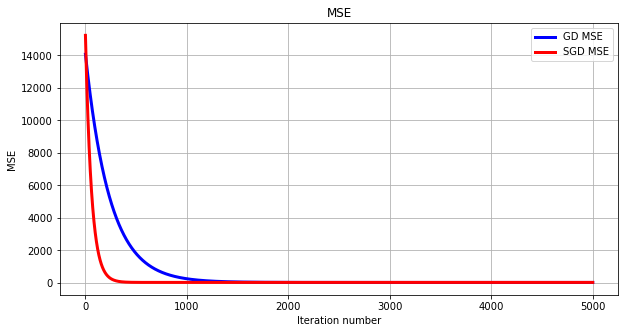

In [26]:
plt.figure(figsize=(10,5))
plt.plot(range(len(err_list_gd)), err_list_gd, linewidth=3, color = 'blue', label = 'GD MSE')
plt.plot(range(len(err_list_sgd)), err_list_sgd, linewidth=3, color = 'red', label = 'SGD MSE')
plt.grid()
plt.legend()

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Модель SGD сошлась быстрее, чем GD